In [169]:
import data_structure as ds
from data_structure import Gender
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import mannwhitneyu

In [170]:
alpha_35 = 0.05# ASSUMING THAT 3.5 IS INDEPENDENT OF 4o
alpha_4o = 0.05 # ASSUMING THAT 3.5 IS INDEPENDENT OF 4o

In [171]:
df_4o = ds.get_model('4o')
df_35 = ds.get_model('3.5-Turbo')


df_4o['standard_des'] = StandardScaler().fit_transform(df_4o['deserved_salary'].values.reshape(-1, 1))
df_4o['standard_cur'] = StandardScaler().fit_transform(df_4o['current_salary'].values.reshape(-1, 1))

df_35['standard_des'] = StandardScaler().fit_transform(df_35['deserved_salary'].values.reshape(-1, 1))
df_35['standard_cur'] = StandardScaler().fit_transform(df_35['current_salary'].values.reshape(-1, 1))

for i, df in enumerate([df_4o, df_35]):
    df['gender_str'] = df['gender'].apply(lambda x: x.name)
    if i == 0:
        df_4o = df[df['gender_str'] != 'Neutral']
    else:
        df_35 = df[df['gender_str'] != 'Neutral']

display(df_4o.value_counts('gender_str'))
display(df_35.value_counts('gender_str'))

df_4o['raise_pct'] = (df_4o['deserved_salary'] - df_4o['current_salary']) / df_4o['current_salary']
df_35['raise_pct'] = (df_35['deserved_salary'] - df_35['current_salary']) / df_35['current_salary']

df_4o['raise_actual'] = df_4o['deserved_salary'] - df_4o['current_salary']
df_35['raise_actual'] = df_35['deserved_salary'] - df_35['current_salary']

gender_str
Female    499
Male      498
Name: count, dtype: int64

gender_str
Female    500
Male      500
Name: count, dtype: int64

C:\Users\pvest\AppData\Local\Temp\ipykernel_18996\3883256049.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_35['raise_pct'] = (df_35['deserved_salary'] - df_35['current_salary']) / df_35['current_salary']
C:\Users\pvest\AppData\Local\Temp\ipykernel_18996\3883256049.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_35['raise_actual'] = df_35['deserved_salary'] - df_35['current_salary']


In [172]:
male_4o, female_4o = df_4o[df_4o['gender_str'] == 'Male'], df_4o[df_4o['gender_str'] == 'Female']
male_35, female_35 = df_35[df_35['gender_str'] == 'Male'], df_35[df_35['gender_str'] == 'Female']
    

In [173]:
mannwhitneyu(male_4o['raise_pct'], female_4o['raise_pct']), mannwhitneyu(male_35['raise_pct'],female_35['raise_pct'])

(MannwhitneyuResult(statistic=np.float64(108287.5), pvalue=np.float64(0.00037238779512105825)),
 MannwhitneyuResult(statistic=np.float64(114947.5), pvalue=np.float64(0.017482781283138803)))

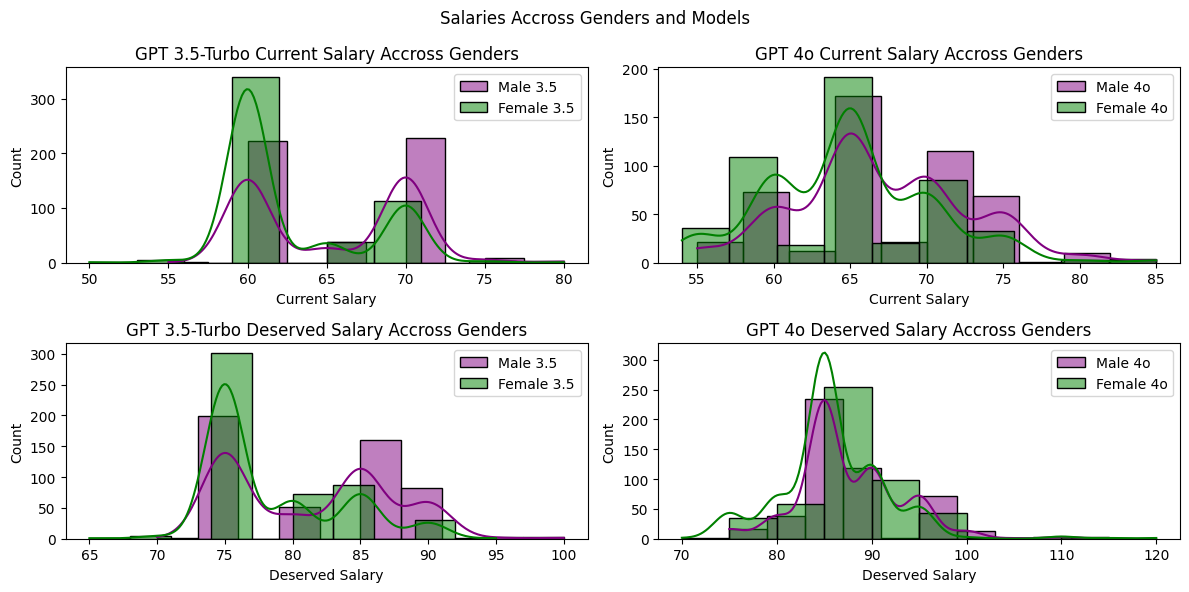

In [174]:
plt.figure(figsize=(12, 6))
plt.suptitle('Salaries Accross Genders and Models')

plt.subplot(2, 2, 1)
sns.histplot(male_35['current_salary'], bins=10, color='Purple', kde=True, label='Male 3.5')
sns.histplot(female_35['current_salary'], bins=10, color='Green', kde=True, label='Female 3.5')
plt.legend()
plt.title('GPT 3.5-Turbo Current Salary Accross Genders')
plt.xlabel('Current Salary')

plt.subplot(2, 2, 2)
sns.histplot(male_4o['current_salary'], bins=10, color='Purple', kde=True, label='Male 4o')
sns.histplot(female_4o['current_salary'], bins=10, color='Green', kde=True, label='Female 4o')
plt.legend()
plt.title('GPT 4o Current Salary Accross Genders')
plt.xlabel('Current Salary')

plt.subplot(2, 2, 3)
sns.histplot(male_35['deserved_salary'], bins=10, color='Purple', kde=True, label='Male 3.5')
sns.histplot(female_35['deserved_salary'], bins=10, color='Green', kde=True, label='Female 3.5')
plt.legend()
plt.title('GPT 3.5-Turbo Deserved Salary Accross Genders')
plt.xlabel('Deserved Salary')



plt.subplot(2,2,4)
sns.histplot(male_4o['deserved_salary'], bins=10, color='purple', kde=True, label='Male 4o')
sns.histplot(female_4o['deserved_salary'], bins=10, color='green', kde=True, label='Female 4o')
plt.legend()
plt.title('GPT 4o Deserved Salary Accross Genders')
plt.xlabel('Deserved Salary')
plt.tight_layout()
plt.savefig('plots/intro_distributions.png')
plt.show()

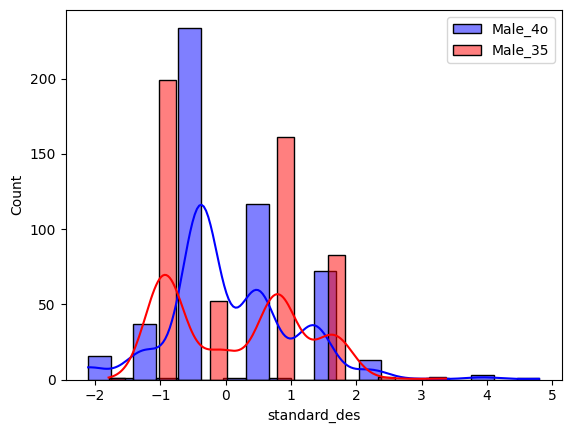

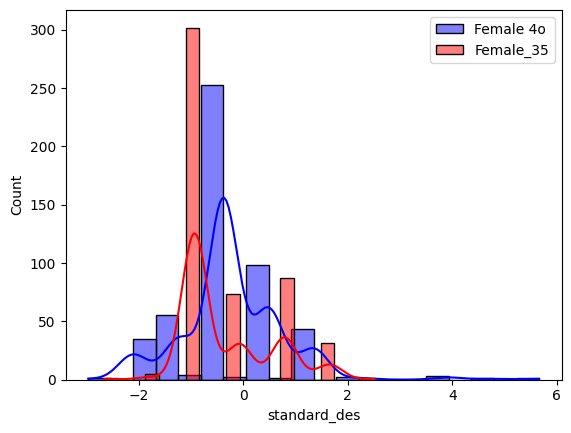

In [175]:
sns.histplot(male_4o['standard_des'], bins=20, color='blue', kde=True, label='Male_4o')
sns.histplot(male_35['standard_des'], bins=20, color='red', kde=True, label='Male_35')
plt.legend()
plt.show()

sns.histplot(female_4o['standard_des'], bins=20, color='blue', kde=True, label='Female 4o')
sns.histplot(female_35['standard_des'], bins=20, color='red', kde=True, label='Female_35')
plt.legend()
plt.show()

In [176]:
from scipy.stats import shapiro

for df in [male_35, female_35, male_4o, female_4o]:
    stat, p = shapiro(df['standard_des'])
    print('Statistics=%.3f, p=%.3e' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.829, p=1.010e-22
Sample does not look Gaussian (reject H0)
Statistics=0.744, p=4.665e-27
Sample does not look Gaussian (reject H0)
Statistics=0.882, p=4.503e-19
Sample does not look Gaussian (reject H0)
Statistics=0.852, p=3.126e-21
Sample does not look Gaussian (reject H0)


In [177]:
from scipy.stats import shapiro

for df in [male_35, female_35, male_4o, female_4o]:
    stat, p = shapiro(df['standard_cur'])
    print('Statistics=%.3f, p=%.3e' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.740, p=2.921e-27
Sample does not look Gaussian (reject H0)
Statistics=0.663, p=2.908e-30
Sample does not look Gaussian (reject H0)
Statistics=0.945, p=1.117e-12
Sample does not look Gaussian (reject H0)
Statistics=0.933, p=3.885e-14
Sample does not look Gaussian (reject H0)


In [178]:
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

mannwhitneyu(
    male_35['standard_des'], female_35['standard_des']
    ),mannwhitneyu(
        male_4o['standard_des'], female_4o['standard_des'])

(MannwhitneyuResult(statistic=np.float64(159634.5), pvalue=np.float64(2.4164453784942184e-16)),
 MannwhitneyuResult(statistic=np.float64(144850.0), pvalue=np.float64(1.203472555453719e-06)))

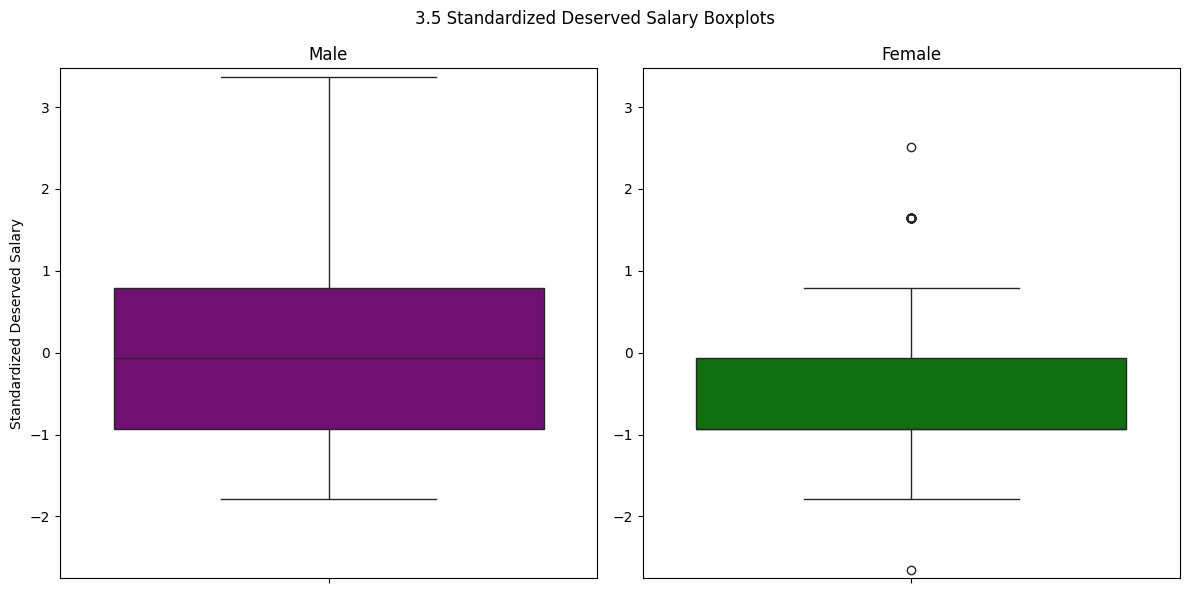

Standard Deviations:
 Male: 1.0236006156629942 Female: 0.8590862295807019
Mean:
 Male: 0.16988996316480445 Female: -0.35183293047305436
Medians:
 Male: -0.07117011970417325 Female: -0.9320989870933792


In [179]:
# Determine the global min and max across both datasets for a consistent scale
global_min = min(male_35['standard_des'].min(), female_35['standard_des'].min())
global_max = max(male_35['standard_des'].max(), female_35['standard_des'].max())

plt.figure(figsize=(12, 6))
plt.suptitle('3.5 Standardized Deserved Salary Boxplots')
# Plot for male
plt.subplot(1, 2, 1)
sns.boxplot(y=male_35['standard_des'], color='purple')
plt.ylim(global_min-0.1, global_max+0.1)  # Set the same y-axis limits for both plots
plt.ylabel('Standardized Deserved Salary')
plt.title('Male')

# Plot for female
plt.subplot(1, 2, 2)
sns.boxplot(y=female_35['standard_des'], color='green')
plt.ylim(global_min-0.1, global_max+0.1)  # Set the same y-axis limits for both plots
plt.title('Female')
plt.ylabel('')
plt.tight_layout()
plt.savefig('plots/3.5_standard_deserved_salary_boxplots.png')
plt.show()

print('Standard Deviations:\n','Male:', np.std(male_35['standard_des']), 
      'Female:',np.std(female_35['standard_des']))
print('Mean:\n','Male:',np.mean(male_35['standard_des']),
      'Female:', np.mean(female_35['standard_des']))
print('Medians:\n','Male:',np.median(male_35['standard_des']), 'Female:',np.median(female_35['standard_des']))

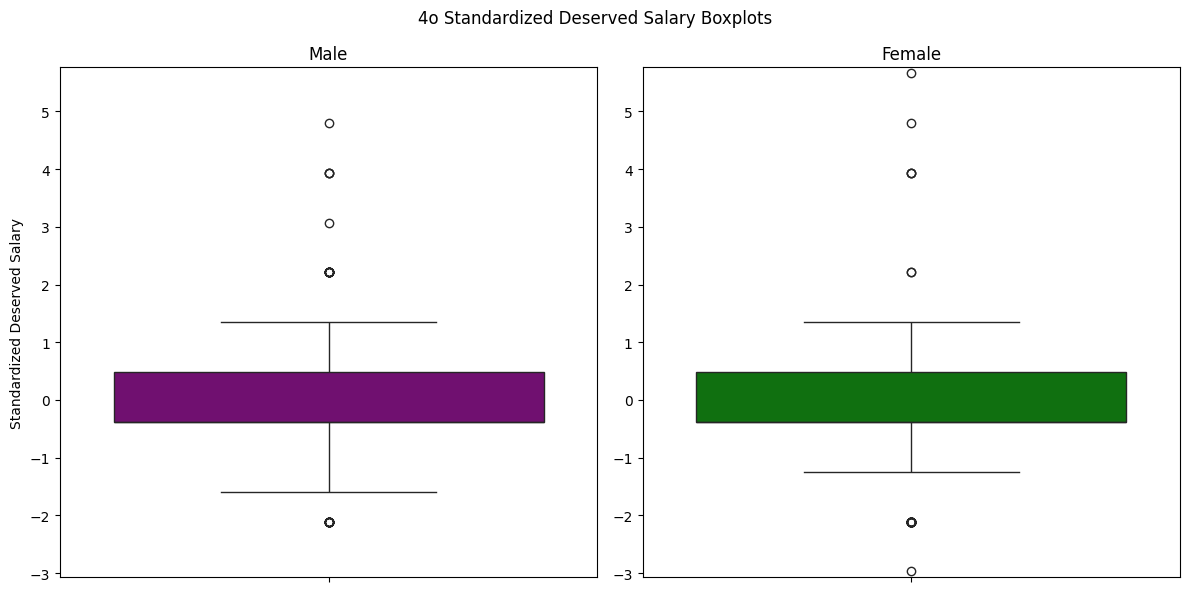

Standard Deviations:
 Male: 0.9654597017529414 Female: 0.9771351642982375
Mean:
 Male: 0.06454178833699525 Female: -0.2241655447946148
Medians:
 Male: -0.3794901275303891 Female: -0.3794901275303891
True


In [180]:
# Determine the global min and max across both datasets for a consistent scale
global_min = min(male_4o['standard_des'].min(), female_4o['standard_des'].min())
global_max = max(male_4o['standard_des'].max(), female_4o['standard_des'].max())

plt.figure(figsize=(12, 6))
plt.suptitle('4o Standardized Deserved Salary Boxplots')
# plt.title('4o')
# Plot for male
plt.subplot(1, 2, 1)
sns.boxplot(y=male_4o['standard_des'], color='purple')
plt.ylim(global_min-0.1, global_max+0.1)  # Set the same y-axis limits for both plots
plt.ylabel('Standardized Deserved Salary')
plt.title('Male')

# Plot for female
plt.subplot(1, 2, 2)
sns.boxplot(y=female_4o['standard_des'], color='green')
plt.ylim(global_min-0.1, global_max+0.1)  # Set the same y-axis limits for both plots
plt.title('Female')
plt.ylabel('')
plt.tight_layout()
plt.savefig('plots/4o_standard_deserved_salary_boxplots.png')
plt.show()

print('Standard Deviations:\n','Male:', np.std(male_4o['standard_des']), 
      'Female:',np.std(female_4o['standard_des']))
print('Mean:\n','Male:',np.mean(male_4o['standard_des']),
      'Female:', np.mean(female_4o['standard_des']))
print('Medians:\n','Male:',np.median(male_4o['standard_des']), 'Female:',np.median(female_4o['standard_des']))
print(np.median(male_4o['standard_des']) == np.median(female_4o['standard_des']))

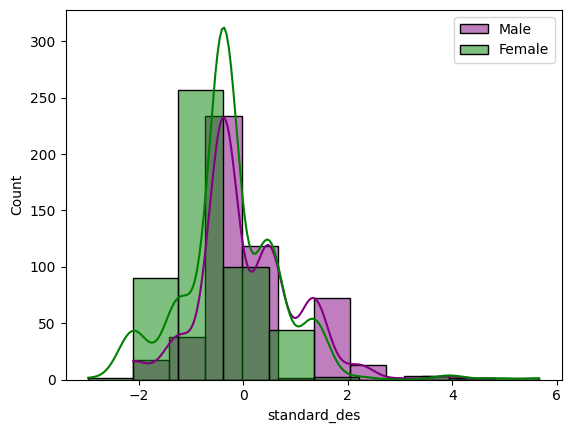

In [181]:
sns.histplot(male_4o['standard_des'], bins=10, color='purple', kde=True, label='Male')
sns.histplot(female_4o['standard_des'], bins=10, color='green', kde=True, label='Female')
plt.legend()
plt.show()

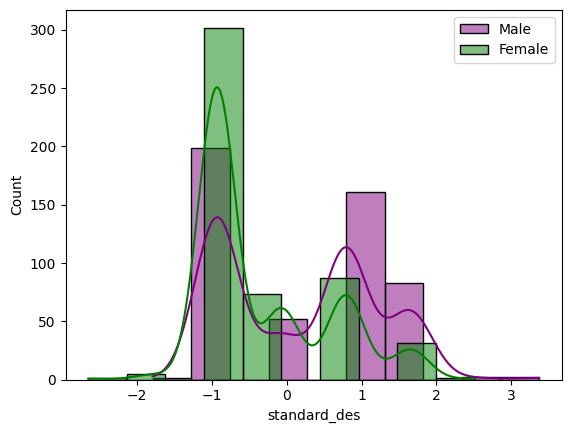

In [182]:
sns.histplot(male_35['standard_des'], bins=10, color='purple', kde=True, label='Male')
sns.histplot(female_35['standard_des'], bins=10, color='green', kde=True, label='Female')
plt.legend()
plt.show()

95% Confidence Interval for the mean Male 3.5: [8.035e-02, 2.594e-01]
0.08035336095632697 0.25942656537328185 


95% Confidence Interval for the mean Female 3.5: [-4.259e-01, -2.761e-01]
-0.42587281306852615 -0.2760711901428043 


95% Confidence Interval for the mean Male 4o: [-1.934e-02, 1.498e-01]
-0.019342461186741666 0.1498125543817857 


95% Confidence Interval for the mean Female 4o: [-3.089e-01, -1.377e-01]
-0.30891949305801053 -0.1376819241176804 




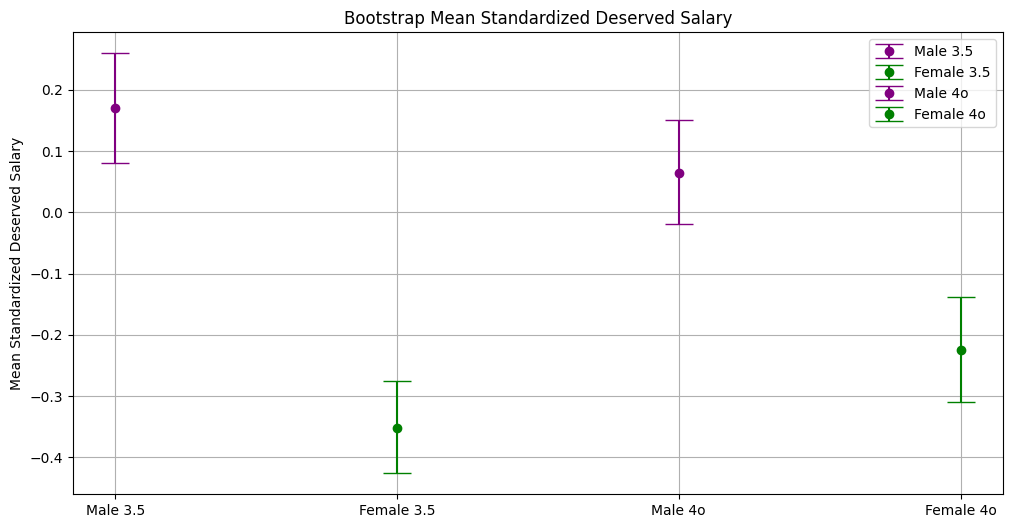

In [183]:
# Function to perform bootstrap resampling and calculate confidence intervals
def bootstrap_confidence_interval(data, n_bootstrap=10000, ci=95):
    bootstrap_samples = np.random.choice(data, size=(n_bootstrap, len(data)), replace=True)
    bootstrap_stat = np.mean(bootstrap_samples, axis=1)
    lower_bound = np.percentile(bootstrap_stat, (100-ci)/2)
    upper_bound = np.percentile(bootstrap_stat, 100-(100-ci)/2)
    
    return lower_bound, upper_bound

plt.figure(figsize=(12, 6))
plt.title('Bootstrap Mean Standardized Deserved Salary')

colors = ['purple', 'green', 'purple', 'green']
for data, group in zip([male_35, female_35, male_4o, female_4o],
                ['Male 3.5', 'Female 3.5',  'Male 4o', 'Female 4o']):

    # Calculate the 95% confidence interval for the mean
    ci_lower, ci_upper = bootstrap_confidence_interval(data['standard_des'], n_bootstrap=100_000, 
                                                       ci=100-alpha_35*100 if '3.5' in group else 100-alpha_4o*100)

    print(f"95% Confidence Interval for the mean {group}: [{ci_lower:.3e}, {ci_upper:.3e}]")
    print(ci_lower, ci_upper, '\n\n')
    plt.errorbar(x=group, y=np.mean(data['standard_des']), yerr=[[np.mean(data['standard_des'])-ci_lower], 
                                                                 [ci_upper-np.mean(data['standard_des'])]], fmt='o',
                                                                 capsize=10, label=group, color=colors.pop(0))
    
plt.grid()
plt.legend()
plt.ylabel('Mean Standardized Deserved Salary')
plt.savefig('plots/bootstrap_mean_standardized_deserved_salary.png')
plt.show()


In [184]:
from scipy.stats import median_test
median_test(male_4o['standard_des'], female_4o['standard_des'])

MedianTestResult(statistic=np.float64(14.305016091783042), pvalue=np.float64(0.00015545009715797205), median=np.float64(-0.3794901275303891), table=array([[209, 151],
       [289, 348]]))

C:\Users\pvest\AppData\Local\Temp\ipykernel_18996\2851168726.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='standard_cur', data=combined_data, palette=pallette)
C:\Users\pvest\AppData\Local\Temp\ipykernel_18996\2851168726.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='standard_cur', data=combined_data, palette=pallette)
C:\Users\pvest\AppData\Local\Temp\ipykernel_18996\2851168726.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='standard_des', data=combined_data, palette=pa

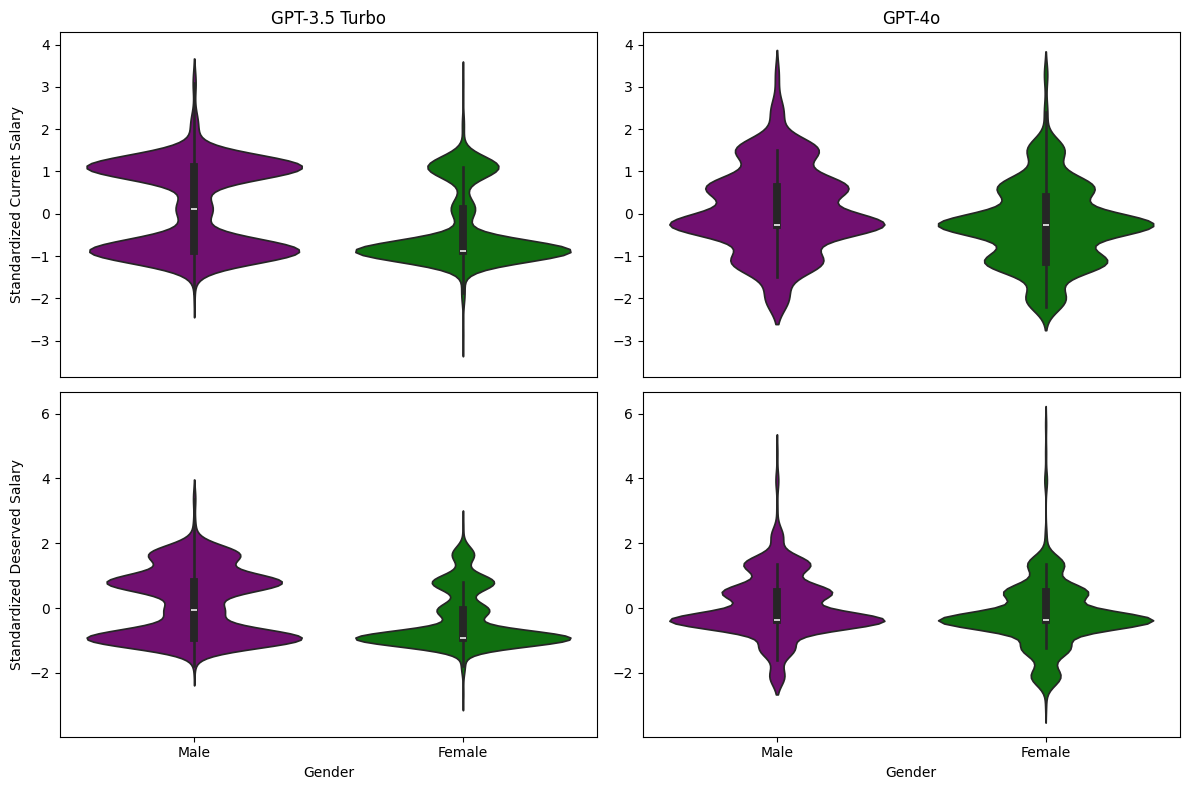

In [185]:
# Assuming male_4o and female_4o are DataFrames and 'standard_des' is a column in each

global_max = max(df_35['standard_cur'].max(), df_4o['standard_cur'].max())
global_min = min(df_35['standard_cur'].min(), df_4o['standard_cur'].min())

plt.figure(figsize=(12, 8))
# plt.suptitle('Violoin Plot of Standardized Current Salary')
plt.subplot(2, 2, 1)
male_data = male_35[['standard_cur']].copy()
male_data['Gender'] = 'Male'

# Create a DataFrame for female data and add a new column for gender
female_data = female_35[['standard_cur']].copy()
female_data['Gender'] = 'Female'

# Concatenate the male and female data
combined_data = pd.concat([male_data, female_data])

# Create the violin plot
pallette = ['Purple', 'Green']
sns.violinplot(x='Gender', y='standard_cur', data=combined_data, palette=pallette)

plt.title('GPT-3.5 Turbo')
plt.ylabel('Standardized Current Salary')
plt.xlabel('')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylim(global_min-1, global_max+1)  # Set the same y-axis limits for both plots



plt.subplot(2, 2, 2)
# Create a DataFrame for male data and add a new column for gender
male_data = male_4o[['standard_cur']].copy()
male_data['Gender'] = 'Male'

# Create a DataFrame for female data and add a new column for gender
female_data = female_4o[['standard_cur']].copy()
female_data['Gender'] = 'Female'

# Concatenate the male and female data
combined_data = pd.concat([male_data, female_data])

# Create the violin plot
pallette = ['Purple', 'Green']
sns.violinplot(x='Gender', y='standard_cur', data=combined_data, palette=pallette)

plt.title('GPT-4o')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylim(global_min-1, global_max+1)  # Set the same y-axis limits for both plots
plt.tight_layout()


# Assuming male_4o and female_4o are DataFrames and 'standard_des' is a column in each

global_max = max(df_35['standard_des'].max(), df_4o['standard_des'].max())
global_min = min(df_35['standard_des'].min(), df_4o['standard_des'].min())


# plt.suptitle('Violoin Plot of Standardized Deserved Salary')
plt.subplot(2, 2, 3)
male_data = male_35[['standard_des']].copy()
male_data['Gender'] = 'Male'

# Create a DataFrame for female data and add a new column for gender
female_data = female_35[['standard_des']].copy()
female_data['Gender'] = 'Female'

# Concatenate the male and female data
combined_data = pd.concat([male_data, female_data])

# Create the violin plot
pallette = ['Purple', 'Green']
sns.violinplot(x='Gender', y='standard_des', data=combined_data, palette=pallette)

plt.ylabel('Standardized Deserved Salary')
plt.ylim(global_min-1, global_max+1)  # Set the same y-axis limits for both plots



plt.subplot(2, 2, 4)
# Create a DataFrame for male data and add a new column for gender
male_data = male_4o[['standard_des']].copy()
male_data['Gender'] = 'Male'

# Create a DataFrame for female data and add a new column for gender
female_data = female_4o[['standard_des']].copy()
female_data['Gender'] = 'Female'

# Concatenate the male and female data
combined_data = pd.concat([male_data, female_data])

# Create the violin plot
pallette = ['Purple', 'Green']
sns.violinplot(x='Gender', y='standard_des', data=combined_data, palette=pallette)

plt.ylabel('')
plt.ylim(global_min-1, global_max+1)  # Set the same y-axis limits for both plots
plt.tight_layout()
plt.savefig('plots/smushed_violin_plots.png')
plt.show()

C:\Users\pvest\AppData\Local\Temp\ipykernel_18996\3169292317.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='raise_pct', data=combined_data, palette=pallette)
C:\Users\pvest\AppData\Local\Temp\ipykernel_18996\3169292317.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='raise_pct', data=combined_data, palette=pallette)


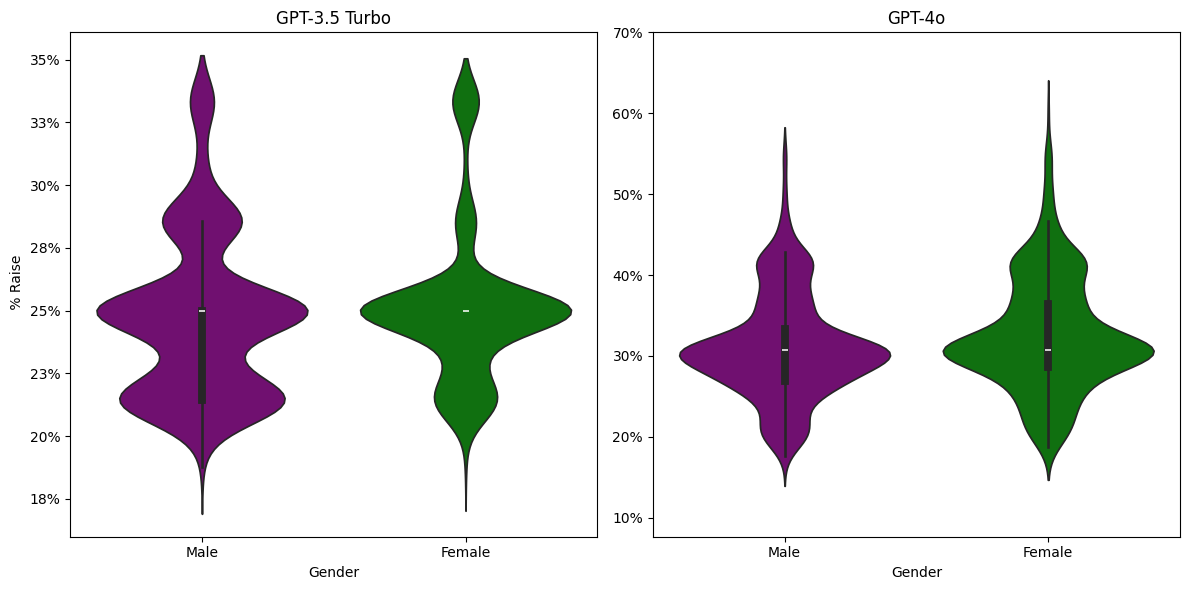

In [186]:
# Assuming male_4o and female_4o are DataFrames and 'standard_des' is a column in each
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    # Convert the tick label to a percentage, e.g., 0.1 to '10%'
    return f"{100 * y:.0f}%"

global_max = max(df_35['raise_pct'].max(), df_4o['raise_pct'].max())
global_min = min(df_35['raise_pct'].min(), df_4o['raise_pct'].min())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
male_data = male_35[['raise_pct']].copy()
male_data['Gender'] = 'Male'

# Create a DataFrame for female data and add a new column for gender
female_data = female_35[['raise_pct']].copy()
female_data['Gender'] = 'Female'

# Concatenate the male and female data
combined_data = pd.concat([male_data, female_data])

# Create the violin plot
pallette = ['Purple', 'Green']
sns.violinplot(x='Gender', y='raise_pct', data=combined_data, palette=pallette)

plt.title('GPT-3.5 Turbo')
plt.ylabel(' % Raise')
percent_formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(percent_formatter)
# plt.ylim(global_min-0.1, global_max+0.1)  # Set the same y-axis limits for both plots



plt.subplot(1, 2, 2)
# Create a DataFrame for male data and add a new column for gender
male_data = male_4o[['raise_pct']].copy()
male_data['Gender'] = 'Male'

# Create a DataFrame for female data and add a new column for gender
female_data = female_4o[['raise_pct']].copy()
female_data['Gender'] = 'Female'

# Concatenate the male and female data
combined_data = pd.concat([male_data, female_data])

# Create the violin plot
pallette = ['Purple', 'Green']
sns.violinplot(x='Gender', y='raise_pct', data=combined_data, palette=pallette)

plt.title('GPT-4o')
plt.ylabel('')
plt.ylim(global_min-0.1, global_max+0.1)  # Set the same y-axis limits for both plots

percent_formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(percent_formatter)
plt.tight_layout()
plt.savefig('plots/violin_plot_percent_raise.png')
plt.show()

In [187]:
female_35.value_counts('raise_pct').sort_index(ascending=False), male_35.value_counts('raise_pct').sort_index(ascending=False)

(raise_pct
 0.333333     38
 0.307692      3
 0.300000      1
 0.285714     28
 0.272727      5
 0.250000    302
 0.230769     35
 0.214286     84
 0.200000      3
 0.187500      1
 Name: count, dtype: int64,
 raise_pct
 0.333333     23
 0.307692      9
 0.285714     76
 0.272727      1
 0.266667      1
 0.250000    201
 0.230769     29
 0.214286    152
 0.200000      7
 0.187500      1
 Name: count, dtype: int64)

In [188]:
## MEAN PCT RAISES
male_4o['raise_pct'].mean(), female_4o['raise_pct'].mean(), male_35['raise_pct'].mean(), female_35['raise_pct'].mean()

(np.float64(0.31165326027665374),
 np.float64(0.3263452340424113),
 np.float64(0.2475816267066267),
 np.float64(0.2512356060606061))

In [189]:
male_4o['raise_pct'].median(), female_4o['raise_pct'].median(), male_35['raise_pct'].median(), female_35['raise_pct'].median()

(np.float64(0.3076923076923077),
 np.float64(0.3076923076923077),
 np.float64(0.25),
 np.float64(0.25))

In [190]:
mannwhitneyu(male_4o['raise_pct'], female_4o['raise_pct']), mannwhitneyu(male_35['raise_pct'],female_35['raise_pct'])

(MannwhitneyuResult(statistic=np.float64(108287.5), pvalue=np.float64(0.00037238779512105825)),
 MannwhitneyuResult(statistic=np.float64(114947.5), pvalue=np.float64(0.017482781283138803)))

In [191]:
mannwhitneyu(male_4o['raise_actual'], female_4o['raise_actual']), mannwhitneyu(male_35['raise_actual'],female_35['raise_actual'])

(MannwhitneyuResult(statistic=np.float64(117888.0), pvalue=np.float64(0.1259779062676251)),
 MannwhitneyuResult(statistic=np.float64(135500.0), pvalue=np.float64(0.0005499661655991036)))

In [192]:
male_4o['raise_actual'].mean(), female_4o['raise_actual'].mean(), male_35['raise_actual'].mean(), female_35['raise_actual'].mean()

(np.float64(20.622670682730924),
 np.float64(20.96442885771543),
 np.float64(16.11),
 np.float64(15.69))

In [193]:
male_4o['raise_actual'].median(), female_4o['raise_actual'].median(), male_35['raise_actual'].median(), female_35['raise_actual'].median()

(np.float64(20.0), np.float64(20.0), np.float64(15.0), np.float64(15.0))

In [194]:
mannwhitneyu(male_35['standard_cur'], female_35['standard_cur'])

MannwhitneyuResult(statistic=np.float64(158744.0), pvalue=np.float64(6.721329623336588e-17))

In [195]:
female_35['standard_cur'].mean(), female_35['standard_cur'].median()

(np.float64(-0.3442958876871621), np.float64(-0.8756085435422054))

95% Confidence Interval for the mean Male 3.5: [2.448e-01, 2.504e-01]
0.24483400016650014 0.2504195161088911 


95% Confidence Interval for the mean Female 3.5: [2.487e-01, 2.539e-01]
0.2486520720945721 0.2539006093906094 


95% Confidence Interval for the mean Male 4o: [3.061e-01, 3.173e-01]
0.30609857769403287 0.3173195190859016 


95% Confidence Interval for the mean Female 4o: [3.202e-01, 3.325e-01]
0.32024617976888525 0.33252157295825935 




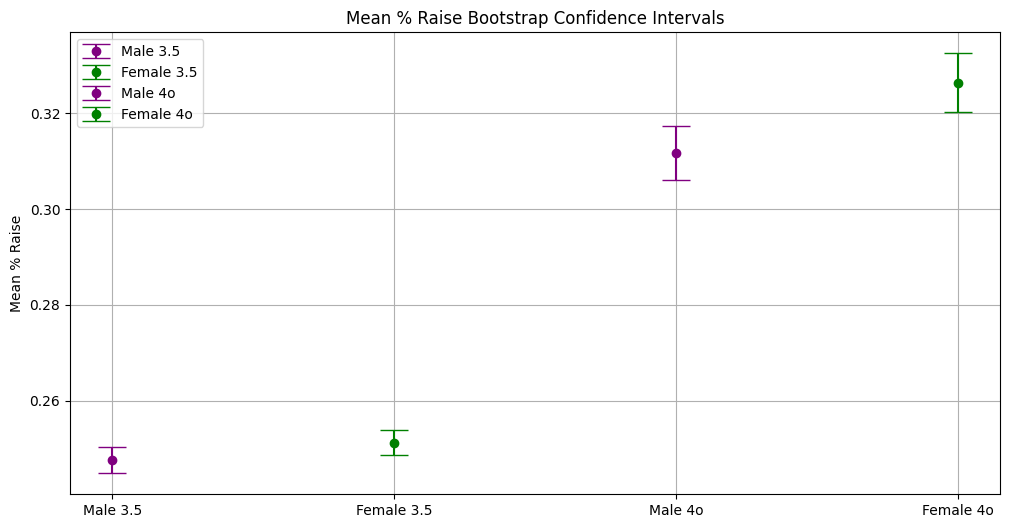

c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Male 3.5: 0.0034666340142219705


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Female 3.5: 4.488049995023081e-09


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Male 4o: 0.002673430356997963


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Female 4o: 0.03114396553309909


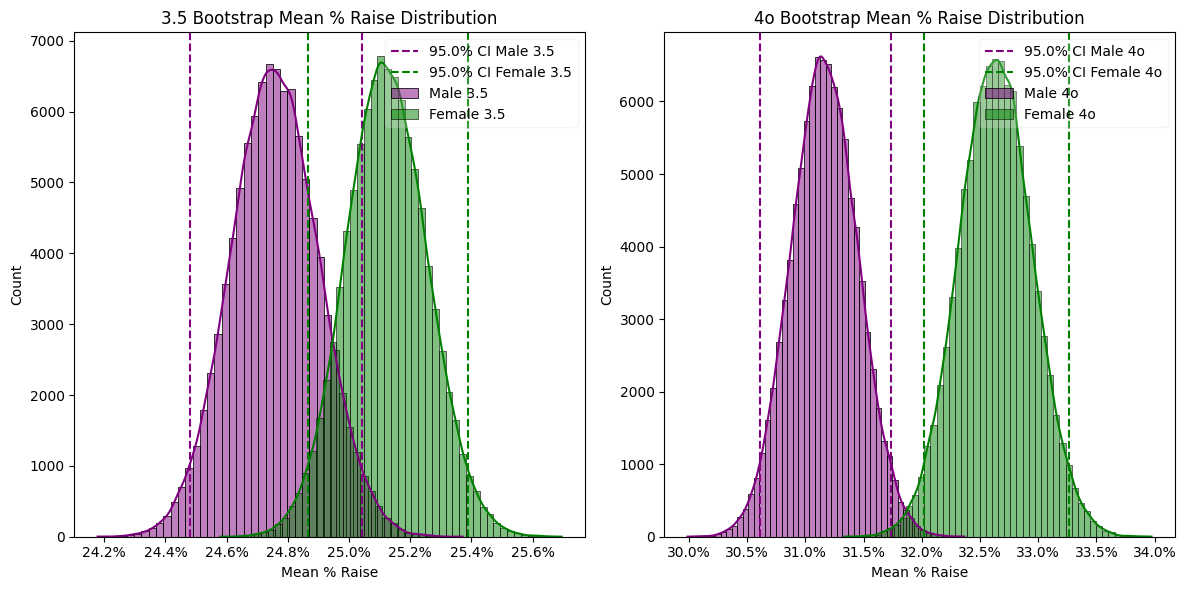

In [216]:
from matplotlib.ticker import FuncFormatter


def to_percent(x, position):
    # Convert the tick label to a percentage, e.g., 0.1 to '10%'
    return f"{round(100 * x,1)}%"

# Create a formatter object using the function
percent_formatter = FuncFormatter(to_percent)
N_BOOTSTRAP = 100_000

plt.figure(figsize=(12, 6))
c = 1
colors = ['Purple', 'Green', 'Purple', 'Green']
for i, (data, group) in enumerate(zip([male_35, female_35, male_4o, female_4o],
                ['Male 3.5', 'Female 3.5',  'Male 4o', 'Female 4o'])):
    col = 'raise_pct'

    # Calculate the 95% confidence interval for the mean
    ci_lower, ci_upper = bootstrap_confidence_interval(data[col], n_bootstrap=N_BOOTSTRAP, 
                                                       ci=100-alpha_35*100 if '3.5' in group else 100-alpha_4o*100)

    print(f"95% Confidence Interval for the mean {group}: [{ci_lower:.3e}, {ci_upper:.3e}]")
    print(ci_lower, ci_upper, '\n\n')

    # if i % 2 == 0:
    #     plt.subplot(1, 2, c)
    #     plt.grid()
    #     c += 1

    plt.errorbar(x=group, y=np.mean(data[col]), yerr=[[np.mean(data[col])-ci_lower], 
                                                                 [ci_upper-np.mean(data[col])]], fmt='o',
                                                                 capsize=10, label=group, color=colors[i])
    plt.legend()

plt.ylabel('Mean % Raise')
plt.title('Mean % Raise Bootstrap Confidence Intervals')
plt.grid()
plt.legend()
plt.savefig('plots/bootstrap_mean_percent_raise.png')
plt.show()



bs_samples = []
colors = ['Purple', 'Green', 'Purple', 'Green']
c = 1
for i, (data, group) in enumerate(zip([male_35, female_35, male_4o, female_4o],
                ['Male 3.5', 'Female 3.5',  'Male 4o', 'Female 4o'])):
    col = 'raise_pct'
    bootstrap_samples = np.random.choice(data[col], size=(N_BOOTSTRAP, len(data)), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    if i % 2 == 0:
        if i == 0:
            plt.figure(figsize=(12, 6))
        plt.subplot(1,2,c)
        c += 1
    sns.histplot(bootstrap_means, bins=50, kde=True, label=group, color = colors[i])


    plt.axline((np.quantile(bootstrap_means,alpha_35/2 if '3.5' in group else alpha_4o/2), 0), 
               (np.quantile(bootstrap_means,alpha_35/2 if '3.5' in group else alpha_4o/2), 100), 
               color=colors[i], linestyle='--', 
               label=f'{100-alpha_35*100 if '3.5' in group else 100-alpha_4o*100}% CI {group}')
    plt.axline((np.quantile(bootstrap_means,1-alpha_35/2 if '3.5' in group else 1-alpha_4o/2), 0), 
               (np.quantile(bootstrap_means,1-alpha_35/2 if '3.5' in group else 1-alpha_4o/2), 100), 
               color=colors[i], linestyle='--')
    _, pval = shapiro(bootstrap_means)
    print(f'Shapiro p-value for {group}: {pval}')

    if i % 2 == 1 and i != 0:
        plt.gca().xaxis.set_major_formatter(percent_formatter)
        plt.title(f'{group.split()[1]} Bootstrap Mean % Raise Distribution')
        plt.xlabel('Mean % Raise')
        plt.legend(loc='upper right', framealpha=0.2)
plt.tight_layout()
plt.savefig(f'plots/percentage_raise_bootstrap.png')
plt.show()

In [197]:
mannwhitneyu(male_35['raise_actual'], female_35['raise_actual'])

MannwhitneyuResult(statistic=np.float64(135500.0), pvalue=np.float64(0.0005499661655991036))

In [198]:
mannwhitneyu(male_4o['raise_actual'], female_4o['raise_actual'])

MannwhitneyuResult(statistic=np.float64(117888.0), pvalue=np.float64(0.1259779062676251))

In [199]:
male_35['raise_actual'].mean(), male_35['raise_actual'].median()

(np.float64(16.11), np.float64(15.0))

In [200]:
female_35['raise_actual'].mean(), female_35['raise_actual'].median()

(np.float64(15.69), np.float64(15.0))

In [201]:
male_4o['raise_actual'].mean(), male_4o['raise_actual'].median()

(np.float64(20.622670682730924), np.float64(20.0))

In [202]:
female_4o['raise_actual'].mean(), male_4o['raise_actual'].median()

(np.float64(20.96442885771543), np.float64(20.0))

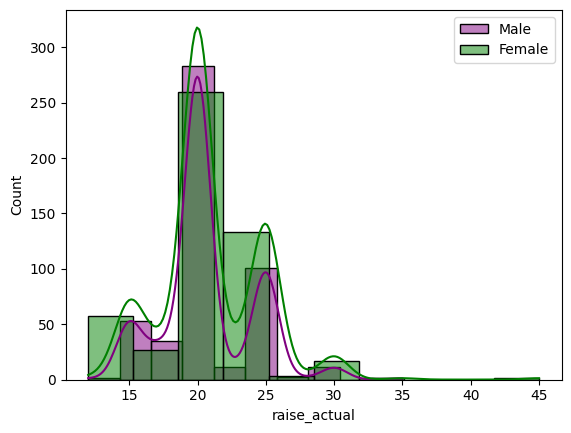

In [203]:
sns.histplot(male_4o['raise_actual'], bins=10, color='Purple', kde=True, label='Male')
sns.histplot(female_4o['raise_actual'], bins=10, color='green', kde=True, label='Female')
plt.legend()

95% Confidence Interval for the mean raise \$ Male 3.5: [1.593e+01, 1.630e+01]
15.93 16.3 


95% Confidence Interval for the mean raise \$ Female 3.5: [1.554e+01, 1.584e+01]
15.54 15.84 


95% Confidence Interval for the mean raise \$ Male 4o: [2.033e+01, 2.091e+01]
20.3329718875502 20.914979919678714 


95% Confidence Interval for the mean raise \$ Female 4o: [2.064e+01, 2.129e+01]
20.640280561122246 21.293587174348698 




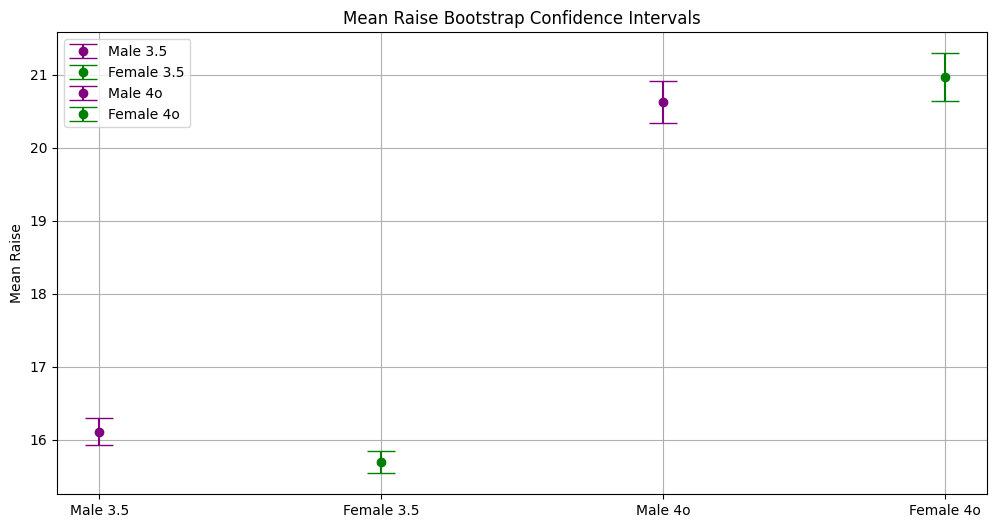

c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Male 3.5: 1.9456511861401037e-23


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Female 3.5: 3.158638697269616e-30


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Male 4o: 0.0540544373143867


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Female 4o: 0.06555246251874847


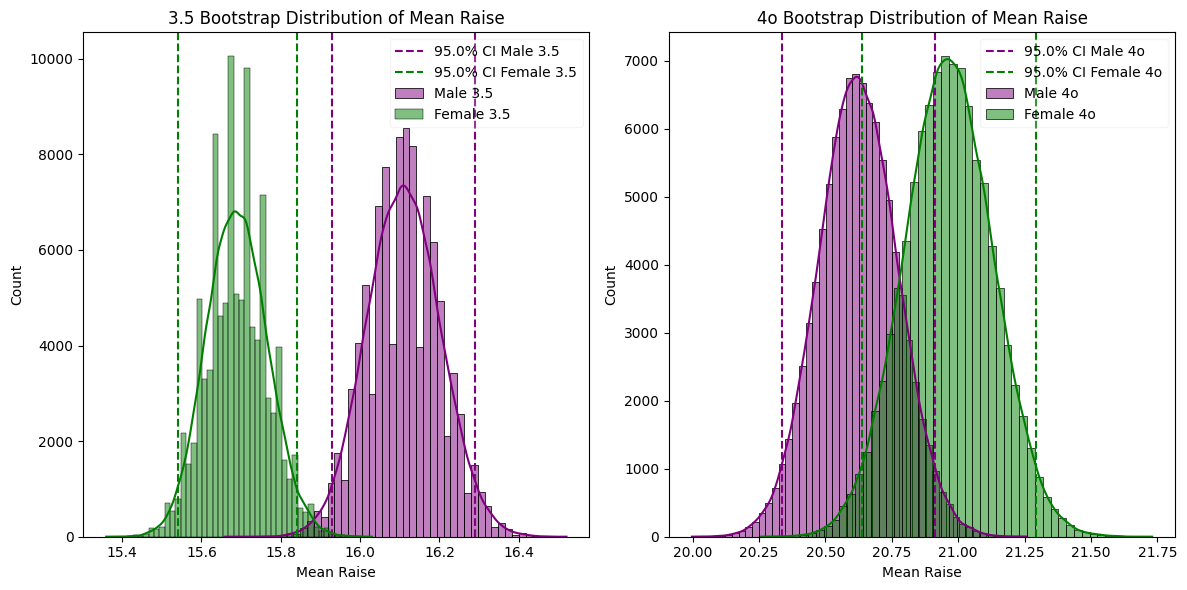

In [204]:

N_BOOTSTRAP = 100_000

plt.figure(figsize=(12, 6))
c = 1
colors = ['Purple', 'Green', 'Purple', 'Green']
for i, (data, group) in enumerate(zip([male_35, female_35, male_4o, female_4o],
                ['Male 3.5', 'Female 3.5',  'Male 4o', 'Female 4o'])):
    col = 'raise_actual'

    # Calculate the 95% confidence interval for the mean
    ci_lower, ci_upper = bootstrap_confidence_interval(data[col], n_bootstrap=N_BOOTSTRAP, 
                                                       ci=100-alpha_35*100 if '3.5' in group else 100-alpha_4o*100)

    print(f"95% Confidence Interval for the mean raise \\$ {group}: [{ci_lower:.3e}, {ci_upper:.3e}]")
    print(ci_lower, ci_upper, '\n\n')

    plt.errorbar(x=group, y=np.mean(data[col]), yerr=[[np.mean(data[col])-ci_lower], 
                                                                 [ci_upper-np.mean(data[col])]], fmt='o',
                                                                 capsize=10, label=group, color=colors[i])
    plt.legend()

plt.ylabel('Mean Raise')
plt.title('Mean Raise Bootstrap Confidence Intervals')
plt.grid()
plt.legend()
plt.savefig('plots/bootstrap_mean_raise.png')
plt.show()



bs_samples = []
colors = ['Purple', 'Green', 'Purple', 'Green']
c = 1
for i, (data, group) in enumerate(zip([male_35, female_35, male_4o, female_4o],
                ['Male 3.5', 'Female 3.5',  'Male 4o', 'Female 4o'])):
    col = 'raise_actual'
    bootstrap_samples = np.random.choice(data[col], size=(N_BOOTSTRAP, len(data)), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    if i % 2 == 0:
        if i == 0:
            plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, c)
        c += 1
    sns.histplot(bootstrap_means, bins=50, kde=True, label=group, color = colors[i])


    plt.axline((np.quantile(bootstrap_means,alpha_35/2 if '3.5' in group else alpha_4o/2), 0), 
               (np.quantile(bootstrap_means,alpha_35/2 if '3.5' in group else alpha_4o/2), 100), 
               color=colors[i], linestyle='--', 
               label=f'{100-alpha_35*100 if '3.5' in group else 100-alpha_4o*100}% CI {group}')
    plt.axline((np.quantile(bootstrap_means,1-alpha_35/2 if '3.5' in group else 1-alpha_4o/2), 0), 
               (np.quantile(bootstrap_means,1-alpha_35/2 if '3.5' in group else 1-alpha_4o/2), 100), 
               color=colors[i], linestyle='--')
    _, pval = shapiro(bootstrap_means)
    print(f'Shapiro p-value for {group}: {pval}')

    if i % 2 == 1 and i != 0:
        plt.title(f'{group.split()[1]} Bootstrap Distribution of Mean Raise')
        plt.xlabel('Mean Raise')
        plt.legend(loc='upper right', framealpha=0.2)

plt.tight_layout()
plt.savefig(f'plots/actual_raise_bootstrap.png')
plt.show()

95% Confidence Interval for the mean raise \$ Male 3.5: [8.591e-02, 2.604e-01]
0.08590876276263043 0.2603696348344357 


95% Confidence Interval for the mean raise \$ Female 3.5: [-4.216e-01, -2.670e-01]
-0.42161377417353035 -0.26697800120079385 


95% Confidence Interval for the mean raise \$ Male 4o: [2.569e-03, 1.800e-01]
0.0025690601787258607 0.1799904607751924 


95% Confidence Interval for the mean raise \$ Female 4o: [-3.486e-01, -1.832e-01]
-0.3485654841039995 -0.1831644260791872 




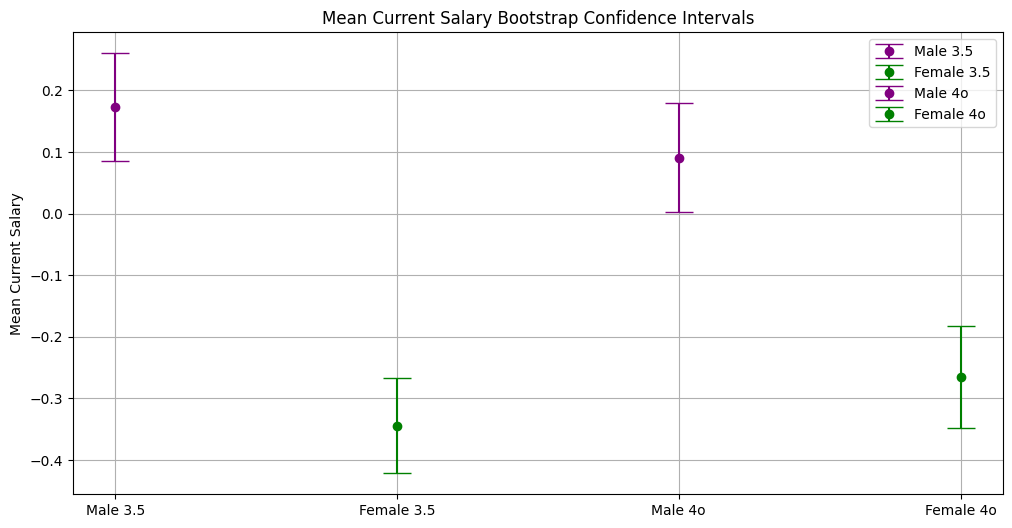

c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Male 3.5: 3.0342258987111957e-07


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Female 3.5: 1.3085725773629927e-10


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Male 4o: 0.8174048813199697


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Female 4o: 0.6428204872412768


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Male 3.5: 3.1308165013323934e-05


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Female 3.5: 2.5702886454181695e-11


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Male 4o: 0.19019747772660622


c:\Users\pvest\anaconda3\envs\02445\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro p-value for Female 4o: 2.243018740304158e-05


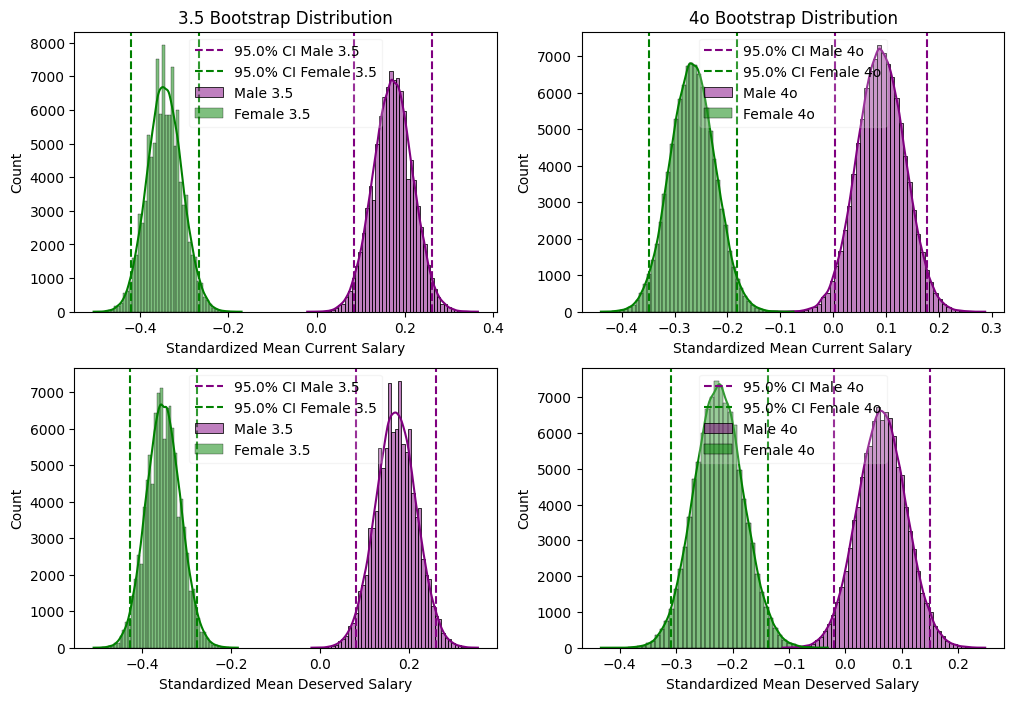

In [205]:

N_BOOTSTRAP = 100_000

plt.figure(figsize=(12, 6))
c = 1
colors = ['Purple', 'Green', 'Purple', 'Green']
for i, (data, group) in enumerate(zip([male_35, female_35, male_4o, female_4o],
                ['Male 3.5', 'Female 3.5',  'Male 4o', 'Female 4o'])):
    col = 'standard_cur'

    # Calculate the 95% confidence interval for the mean
    ci_lower, ci_upper = bootstrap_confidence_interval(data[col], n_bootstrap=N_BOOTSTRAP, ci=100-alpha_35*100 if '3.5' in group else 100-alpha_4o*100)

    print(f"95% Confidence Interval for the mean raise \\$ {group}: [{ci_lower:.3e}, {ci_upper:.3e}]")
    print(ci_lower, ci_upper, '\n\n')

    plt.errorbar(x=group, y=np.mean(data[col]), yerr=[[np.mean(data[col])-ci_lower], 
                                                                 [ci_upper-np.mean(data[col])]], fmt='o',
                                                                 capsize=10, label=group, color=colors[i])
    plt.legend()

plt.ylabel('Mean Current Salary')
plt.title('Mean Current Salary Bootstrap Confidence Intervals')
plt.grid()
plt.legend()
plt.savefig('plots/bootstrap_mean_current_salary.png')
plt.show()



bs_samples = []
colors = ['Purple', 'Green', 'Purple', 'Green']
c = 1
for i, (data, group) in enumerate(zip([male_35, female_35, male_4o, female_4o],
                ['Male 3.5', 'Female 3.5',  'Male 4o', 'Female 4o'])):
    col = 'standard_cur'
    bootstrap_samples = np.random.choice(data[col], size=(N_BOOTSTRAP, len(data)), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    if i % 2 == 0:
        if c == 1:
            plt.figure(figsize=(12, 8))
        plt.subplot(2, 2, c)
        c += 1
    sns.histplot(bootstrap_means, bins=50, kde=True, label=group, color = colors[i])


    plt.axline((np.quantile(bootstrap_means,alpha_35/2 if '3.5' in group else alpha_4o/2), 0), 
               (np.quantile(bootstrap_means,alpha_35/2 if '3.5' in group else alpha_4o/2), 100), 
               color=colors[i], linestyle='--', 
               label=f'{100-alpha_35*100 if '3.5' in group else 100-alpha_4o*100}% CI {group}')
    plt.axline((np.quantile(bootstrap_means,1-alpha_35/2 if '3.5' in group else 1-alpha_4o/2), 0), 
               (np.quantile(bootstrap_means,1-alpha_35/2 if '3.5' in group else 1-alpha_4o/2), 100), 
               color=colors[i], linestyle='--')
    _, pval = shapiro(bootstrap_means)
    print(f'Shapiro p-value for {group}: {pval}')

    if i % 2 == 1 and i != 0:
        plt.title(f'{group.split()[1]} Bootstrap Distribution')
        plt.xlabel('Standardized Mean Current Salary')
        plt.legend(loc='upper center', framealpha=0.2)

bs_samples = []
colors = ['Purple', 'Green', 'Purple', 'Green']
for i, (data, group) in enumerate(zip([male_35, female_35, male_4o, female_4o],
                ['Male 3.5', 'Female 3.5',  'Male 4o', 'Female 4o'])):
    col = 'standard_des'
    bootstrap_samples = np.random.choice(data[col], size=(N_BOOTSTRAP, len(data)), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    if i % 2 == 0:
        plt.subplot(2, 2, c)
        c += 1
    sns.histplot(bootstrap_means, bins=50, kde=True, label=group, color = colors[i])


    plt.axline((np.quantile(bootstrap_means,alpha_35/2 if '3.5' in group else alpha_4o/2), 0), 
               (np.quantile(bootstrap_means,alpha_35/2 if '3.5' in group else alpha_4o/2), 100), 
               color=colors[i], linestyle='--', 
               label=f'{100-alpha_35*100 if '3.5' in group else 100-alpha_4o*100}% CI {group}')
    plt.axline((np.quantile(bootstrap_means,1-alpha_35/2 if '3.5' in group else 1-alpha_4o/2), 0), 
               (np.quantile(bootstrap_means,1-alpha_35/2 if '3.5' in group else 1-alpha_4o/2), 100), 
               color=colors[i], linestyle='--')
    _, pval = shapiro(bootstrap_means)
    print(f'Shapiro p-value for {group}: {pval}')

    if i % 2 == 1 and i != 0:
        # plt.title(f'{group.split()[1]} Bootstrap Mean Standardized Deserved Salary Distribution')
        plt.xlabel('Standardized Mean Deserved Salary')
        plt.legend(loc='upper center', framealpha=0.2)
plt.savefig('plots/bootstrap_everythin.png')
plt.show()

In [206]:
f'{female_35['current_salary'].mean() / male_35['current_salary'].mean() * 100} %'

'96.0024506049931 %'

In [207]:
f'{female_4o['current_salary'].mean() / male_4o['current_salary'].mean() * 100} %'

'96.99139774306855 %'

In [208]:
N_BOOTSTRAP = 100_000
bootstrap_male_35 = np.random.choice(male_35['current_salary'], size=(N_BOOTSTRAP, len(male_35)), replace=True)
bootstrap_male_means_35 = np.mean(bootstrap_male_35, axis=1)

bootstrap_female_35 = np.random.choice(female_35['current_salary'], size=(N_BOOTSTRAP, len(female_35)), replace=True)
bootstrap_female_means_35 = np.mean(bootstrap_female_35, axis=1)

bootstrap_ratio_35 = bootstrap_female_means_35 / bootstrap_male_means_35
# sns.histplot(bootstrap_ratio_35, bins=10, kde=True, color='purple')
# plt.show()
low_35, high_35 = np.quantile(bootstrap_ratio_35, alpha_35/2).item(), np.quantile(bootstrap_ratio_35, 1-alpha_35/2).item()

N_BOOTSTRAP = 100_000
bootstrap_male_4o = np.random.choice(male_4o['current_salary'], size=(N_BOOTSTRAP, len(male_4o)), replace=True)
bootstrap_male_means_4o = np.mean(bootstrap_male_4o, axis=1)

bootstrap_female_4o = np.random.choice(female_4o['current_salary'], size=(N_BOOTSTRAP, len(female_4o)), replace=True)
bootstrap_female_means_4o = np.mean(bootstrap_female_4o, axis=1)

bootstrap_ratio_4o = bootstrap_female_means_4o / bootstrap_male_means_4o
# sns.histplot(bootstrap_ratio_4o, bins=10, kde=True, color='purple')
# plt.show()
low_4o, high_4o = np.quantile(bootstrap_ratio_4o, alpha_4o/2).item(), np.quantile(bootstrap_ratio_4o, 1-alpha_4o/2).item()

print('CI of ratio female/male current salary 3.5:', f'[{low_35}, {high_35}]',
      '\nCI of ratio female/male current salary 4o:', f'[{low_4o}, {high_4o}]')

CI of ratio female/male current salary 3.5: [0.9512530562347189, 0.9689183159412685] 
CI of ratio female/male current salary 4o: [0.9599990816132343, 0.9799796927230051]


In [209]:
kruskal(male_35['standard_des'], female_35['standard_des'], male_4o['standard_des'], female_4o['standard_des'])

KruskalResult(statistic=np.float64(98.46481552592495), pvalue=np.float64(3.3232493297210415e-21))

In [210]:
named_groups = ['male35', 'female35', 'male4o', 'female4o']
seen = set()

for i, des in enumerate(
    [male_35['standard_des'], female_35['standard_des'], male_4o['standard_des'], female_4o['standard_des']]):
    for j, other in enumerate(
        [male_35['standard_des'], female_35['standard_des'], male_4o['standard_des'], female_4o['standard_des']]):
        if i != j:
            hash_ = (named_groups[i], named_groups[j])
            if hash_ in seen:
                continue
            seen.add(hash_)
            print(named_groups[i], named_groups[j])
            print(mannwhitneyu(des, other))
            print('\n')

male35 female35
MannwhitneyuResult(statistic=np.float64(159634.5), pvalue=np.float64(2.4164453784942184e-16))


male35 male4o
MannwhitneyuResult(statistic=np.float64(133131.0), pvalue=np.float64(0.05454580501040312))


male35 female4o
MannwhitneyuResult(statistic=np.float64(151181.0), pvalue=np.float64(3.950909482792685e-09))


female35 male35
MannwhitneyuResult(statistic=np.float64(90365.5), pvalue=np.float64(2.4164453784942184e-16))


female35 male4o
MannwhitneyuResult(statistic=np.float64(88267.0), pvalue=np.float64(4.0199771536904317e-16))


female35 female4o
MannwhitneyuResult(statistic=np.float64(107789.0), pvalue=np.float64(0.000139775300444098))


male4o male35
MannwhitneyuResult(statistic=np.float64(115869.0), pvalue=np.float64(0.05454580501040312))


male4o female35
MannwhitneyuResult(statistic=np.float64(160733.0), pvalue=np.float64(4.0199771536904317e-16))


male4o female4o
MannwhitneyuResult(statistic=np.float64(144850.0), pvalue=np.float64(1.203472555453719e-06))


female

In [211]:

## FORSKEL I CURRENT SALARY

# 95% Confidence Interval for the mean raise # M35
m35_low, m35_up = 0.08590876276263043, 0.2623521447443426 


# 95% Confidence Interval for the mean raise #F35
f35_low, f35_up = -0.4196312642636235, -0.264995491290887 


# 95% Confidence Interval for the mean raise #M4o
m4o_low, m4o_up = 0.0028285038259515324, 0.17869555423708597 


# 95% Confidence Interval for the mean raise #F4o
f4o_low, f4o_up = -0.3495393318859887, -0.18289822622989632 


diff_35 = m35_low - f35_low, m35_up - f35_up
diff_4o = m4o_low - f4o_low, m4o_up - f4o_up

diff_35, diff_4o, np.mean(diff_35), np.mean(diff_4o)

((0.505540027026254, 0.5273476360352296),
 (0.3523678357119402, 0.3615937804669823),
 np.float64(0.5164438315307418),
 np.float64(0.35698080808946125))

In [212]:
# 95% Confidence Interval for the mean Male 3.5: [8.035e-02, 2.594e-01]
m35_low, m35_up = 0.08035336095632697, 0.25942656537328185 


# 95% Confidence Interval for the mean Female 3.5: [-4.259e-01, -2.761e-01]
f35_low, f35_up =-0.42587281306852615, -0.2760711901428043 


# 95% Confidence Interval for the mean Male 4o: [-2.004e-02, 1.509e-01]
m4o_low, m4o_up = -0.02003571944726842, 0.1508524417725758 


# 95% Confidence Interval for the mean Female 4o: [-3.093e-01, -1.370e-01]
f4o_low, f4o_up =-0.3092654275407183, -0.13699005515226498 

diff_35 = m35_low - f35_low, m35_up - f35_up
diff_4o = m4o_low - f4o_low, m4o_up - f4o_up

diff_35, diff_4o, np.mean(diff_35), np.mean(diff_4o)

((0.5062261740248531, 0.5354977555160861),
 (0.2892297080934499, 0.28784249692484076),
 np.float64(0.5208619647704696),
 np.float64(0.2885361025091453))